In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.tight_layout()

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df= pd.read_csv("Asg1_BuildModel_csv.csv")
df.head(5)

ID RATING_DATE  Leverage_percentage  \
0  72023448   22Apr2011             1.224812   
1  72023448   24May2011             1.224812   
2  72023448   22Jun2011             1.224812   
3  72023448   28Jul2011             1.224812   
4  72023448   26Aug2011             1.224812   

   Region with High_Risk ( 0 = no, 1=yes)  Renting_space( 0 = no, 1 = yes)  \
0                                       0                                0   
1                                       0                                0   
2                                       0                                0   
3                                       0                                0   
4                                       0                                0   

   Product_Type_RealEstate(0= no, 1 =yes)  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

    LoancontractperBook_value(percentage)  \
0                                0.990909   
1                                0.985249   
2                                0.979454   
3                                0.970997   
4                                0.962222   

   Industry_Pub_Eq_Hotel_Trans_Ind( 0 = no, 1 = yes)  Car( 0 = no, 1 = yes)  \
0                                                  0                      1   
1                                                  0                      1   
2                                                  0                      1   
3                                                  0                      1   
4                                                  0                      1   

   Payment_arrears_12_months ( 0 = no, 1 = yes)  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Ind_Construction( 0 = yes, 1 = no)  Region_Low_Risk( 0 = no, 1 = yes)  \
0                                   0                                  1   
1                                   0                                  1   
2                                   0                                  1   
3                                   0                                  1   
4                                   0                                  1   

   Solvency_ratio_ per_Y(percentage)  High_risk_Region ( 0 = no, 1 = yes)  \
0                           0.897156                                    0   
1                           0.892032                                    0   
2                           0.886785                                    0   
3                           0.879128                                    0   
4                           0.871183                                    0   

  Total_sales(amount)  DEFAULT into_default_date  \
0         130,481.00         0               NaN   
1         127,584.00         0               NaN   
2         124,679.00         0               NaN   
3         121,766.00         0               NaN   
4         118,842.00         0               NaN   

   INTODEFAULT_flag_on12monthsperformancewindow  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   no_of_days_diff_between_rating_and_default  
0                                           0  
1                                           0  
2                                           0  
3                                           0  
4                                           0

In [3]:
#check number of columns and data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802470 entries, 0 to 802469
Data columns (total 19 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ID                                                 802470 non-null  int64  
 1   RATING_DATE                                        802470 non-null  object 
 2   Leverage_percentage                                802470 non-null  float64
 3   Region with High_Risk ( 0 = no, 1=yes)             802470 non-null  int64  
 4   Renting_space( 0 = no, 1 = yes)                    802470 non-null  int64  
 5   Product_Type_RealEstate(0= no, 1 =yes)             802470 non-null  int64  
 6    LoancontractperBook_value(percentage)             802470 non-null  float64
 7   Industry_Pub_Eq_Hotel_Trans_Ind( 0 = no, 1 = yes)  802470 non-null  int64  
 8   Car( 0 = no, 1 = yes)                              802470 non-null  int64 

In [4]:
#check missing values
null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data.sort_values(by ='Total missing', ascending = False))

Null Values in each column:
                                           column name  Total missing  \
0                                   into_default_date         710756   
10                                        RATING_DATE              0   
17                                Leverage_percentage              0   
16             Region with High_Risk ( 0 = no, 1=yes)              0   
15                    Renting_space( 0 = no, 1 = yes)              0   
14             Product_Type_RealEstate(0= no, 1 =yes)              0   
13              LoancontractperBook_value(percentage)              0   
12  Industry_Pub_Eq_Hotel_Trans_Ind( 0 = no, 1 = yes)              0   
11                              Car( 0 = no, 1 = yes)              0   
9        Payment_arrears_12_months ( 0 = no, 1 = yes)              0   
1                                                  ID              0   
8                   Region_Low_Risk( 0 = no, 1 = yes)              0   
7                   Solvency_ratio_

In [5]:
# transform the data types
df['RATING_DATE']= pd.to_datetime(df['RATING_DATE'], format= '%d%b%Y')
df['RATING_DATE']= df['RATING_DATE'].dt.strftime('%d-%m-%y')
df['Total_sales(amount)'] = df['Total_sales(amount)'].str.replace(',','')
df['Total_sales(amount)'] = pd.to_numeric(df['Total_sales(amount)'], errors= 'coerce')
df['Total_sales(amount)']= df['Total_sales(amount)'].astype('Int64', errors= 'ignore')

In [6]:
#aggregate per ID
df['Total_sales(amount)']= df['Total_sales(amount)'].fillna(0)
df1 = {
    'Leverage_percentage': 'mean',
    'Region with High_Risk ( 0 = no, 1=yes)': lambda x: x.mode()[0],
    'Renting_space( 0 = no, 1 = yes)': lambda x: x.mode()[0],
    'Product_Type_RealEstate(0= no, 1 =yes)': lambda x: x.mode()[0],
    ' LoancontractperBook_value(percentage)': 'mean',  
    'Industry_Pub_Eq_Hotel_Trans_Ind( 0 = no, 1 = yes)': lambda x: x.mode()[0],
    'Car( 0 = no, 1 = yes)': lambda x: x.mode()[0],
    'Payment_arrears_12_months ( 0 = no, 1 = yes)': lambda x: x.mode()[0],
    'Ind_Construction( 0 = yes, 1 = no)': lambda x: x.mode()[0],
    'Region_Low_Risk( 0 = no, 1 = yes)': lambda x: x.mode()[0],
    'Solvency_ratio_ per_Y(percentage)': 'mean',
    'High_risk_Region ( 0 = no, 1 = yes)': lambda x: x.mode()[0],
    'Total_sales(amount)': 'sum',
    'DEFAULT': 'max',
    'INTODEFAULT_flag_on12monthsperformancewindow': 'max',
    'no_of_days_diff_between_rating_and_default': 'max'
}
df2 = df.groupby('ID').agg(df1).reset_index()
df2

ID  Leverage_percentage  Region with High_Risk ( 0 = no, 1=yes)  \
0      72023448             1.224812                                       0   
1      72023670             0.083600                                       0   
2      72027040             0.103280                                       0   
3      72131032             1.224812                                       0   
4      72150192             0.067200                                       0   
...         ...                  ...                                     ...   
40962  93765990             1.224812                                       0   
40963  93770024             1.224812                                       0   
40964  93788920             1.224812                                       0   
40965  93789476             1.224812                                       0   
40966  93800866             1.224812                                       0   

       Renting_space( 0 = no, 1 = yes)  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    1   
...                                ...   
40962                                0   
40963                                0   
40964                                0   
40965                                0   
40966                                0   

       Product_Type_RealEstate(0= no, 1 =yes)  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
40962                                       0   
40963                                       0   
40964                                       0   
40965                                       0   
40966                                       0   

        LoancontractperBook_value(percentage)  \
0                                    0.977766   
1                                    0.000000   
2                                    0.875717   
3                                    0.000000   
4                                    0.417439   
...                                       ...   
40962                                1.050846   
40963                                1.023000   
40964                                0.969109   
40965                                0.918427   
40966                                0.862113   

       Industry_Pub_Eq_Hotel_Trans_Ind( 0 = no, 1 = yes)  \
0                                                      0   
1                                                      0   
2                                                      1   
3                                                      0   
4                                                      0   
...                                                  ...   
40962                                                  0   
40963                                                  0   
40964                                                  0   
40965                                                  0   
40966                                                  0   

       Car( 0 = no, 1 = yes)  Payment_arrears_12_months ( 0 = no, 1 = yes)  \
0                          1                                             0   
1                          0                                             0   
2                          1                                             0   
3                          0                                             0   
4                          0                                             0   
...                      ...                                           ...   
40962                      1                                             0   
40963                   

In [7]:
#rename columns
df2.rename(columns={'Region with High_Risk ( 0 = no, 1=yes)':'Region_with_High_Risk',
                        'Renting_space( 0 = no, 1 = yes)':'Renting_space',
                        'Product_Type_RealEstate(0= no, 1 =yes)':'Product_Type_RealEstate',
                        ' LoancontractperBook_value(percentage)':'LoancontractperBook_value',
                        'Industry_Pub_Eq_Hotel_Trans_Ind( 0 = no, 1 = yes)':'Industry_Pub_Eq_Hotel_Trans_Ind',
                        'Car( 0 = no, 1 = yes)':'Car',
                        'Payment_arrears_12_months ( 0 = no, 1 = yes)':'Payment_arrears_12_months',
                        'Ind_Construction( 0 = yes, 1 = no)':'Ind_Construction',
                        'Region_Low_Risk( 0 = no, 1 = yes)':'Region_Low_Risk',
                        'Solvency_ratio_ per_Y(percentage)':'Solvency_ratio_ per_Y',
                        'High_risk_Region ( 0 = no, 1 = yes)':'High_risk_Region',
                        'Total_sales(amount)':'Total_sales'},inplace=True)
df2

ID  Leverage_percentage  Region_with_High_Risk  Renting_space  \
0      72023448             1.224812                      0              0   
1      72023670             0.083600                      0              0   
2      72027040             0.103280                      0              0   
3      72131032             1.224812                      0              0   
4      72150192             0.067200                      0              1   
...         ...                  ...                    ...            ...   
40962  93765990             1.224812                      0              0   
40963  93770024             1.224812                      0              0   
40964  93788920             1.224812                      0              0   
40965  93789476             1.224812                      0              0   
40966  93800866             1.224812                      0              0   

       Product_Type_RealEstate  LoancontractperBook_value  \
0                            0                   0.977766   
1                            0                   0.000000   
2                            0                   0.875717   
3                            0                   0.000000   
4                            0                   0.417439   
...                        ...                        ...   
40962                        0                   1.050846   
40963                        0                   1.023000   
40964                        0                   0.969109   
40965                        0                   0.918427   
40966                        0                   0.862113   

       Industry_Pub_Eq_Hotel_Trans_Ind  Car  Payment_arrears_12_months  \
0                                    0    1                          0   
1                                    0    0                          0   
2                                    1    1                          0   
3                                    0    0                          0   
4                                    0    0                          0   
...                                ...  ...                        ...   
40962                                0    1                          0   
40963                                0    1                          0   
40964                                0    1                          0   
40965                                0    1                          0   
40966                                0    1                          0   

       Ind_Construction  Region_Low_Risk  Solvency_ratio_ per_Y  \
0                     0                1               0.885257   
1                     0                1               0.000000   
2                     0                1               0.792863   
3                     0                1               0.000000   
4                     0                1              -0.377944   
...                 ...              ...                    ...   
40962                 0                0               0.951422   
40963                 0                0               0.926211   
40964                 0                0               0.877419   
40965                 0                0               0.831532   
40966                 0                0               0.780546   

       High_risk_Region   Total_sales  DEFAULT  \
0                     0  6.233520e+05        0   
1                     0  9.694880e+05        0   
2                     0  8.364100e+05        0   
3                     0  3.199200e+05        0   
4                     0  1.567930e+05        0   
...                 ...           ...      ...   
40962                 0  1.181844e+21        0   
40963                 0  1.745609e+21        0   
40964                 0  1.932125e+21        0   
40965                 0  1.779953e+21        0   
40966                 0  1.625687e+21        0   

       INTODEFAULT_flag_on12monthsperformancewin

In [8]:
#dropping irrelevant columns
data= df2.drop(['ID','DEFAULT'], axis=1)

In [9]:
#check multicollinear features
from statsmodels.stats.outliers_influence import variance_inflation_factor 
Xi= data.drop('INTODEFAULT_flag_on12monthsperformancewindow',axis=1)
vif_data = pd.DataFrame() 
vif_data["feature"] = Xi.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(Xi.values, i) 
                          for i in range(len(Xi.columns))] 
  
print(vif_data)

                                       feature       VIF
0                          Leverage_percentage  0.163934
1                        Region_with_High_Risk  0.901533
2                                Renting_space  0.914980
3                      Product_Type_RealEstate  0.864257
4                    LoancontractperBook_value  0.031218
5              Industry_Pub_Eq_Hotel_Trans_Ind  0.859796
6                                          Car  0.389303
7                    Payment_arrears_12_months  0.889703
8                             Ind_Construction  0.895962
9                              Region_Low_Risk  0.397132
10                       Solvency_ratio_ per_Y  0.032196
11                            High_risk_Region  0.901533
12                                 Total_sales  1.020897
13  no_of_days_diff_between_rating_and_default  0.894096


In [10]:
preprocess_data= data

In [11]:
#woe, iv
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [12]:
iv, woe = iv_woe(preprocess_data, target='INTODEFAULT_flag_on12monthsperformancewindow', bins=20)

Information value of Leverage_percentage is 0.100278
Information value of Region_with_High_Risk is 0.000585
Information value of Renting_space is 0.014933
Information value of Product_Type_RealEstate is 0.003946
Information value of LoancontractperBook_value is 0.155066
Information value of Industry_Pub_Eq_Hotel_Trans_Ind is 0.01462
Information value of Car is 0.029596
Information value of Payment_arrears_12_months is 0.834995
Information value of Ind_Construction is 0.071472
Information value of Region_Low_Risk is 0.008582
Information value of Solvency_ratio_ per_Y is 0.156392
Information value of High_risk_Region is 0.000585
Information value of Total_sales is 0.092559
Information value of no_of_days_diff_between_rating_and_default is 10.979346


In [13]:
#information value
print(iv)

                                     Variable         IV
0                         Leverage_percentage   0.100278
0                       Region_with_High_Risk   0.000585
0                               Renting_space   0.014933
0                     Product_Type_RealEstate   0.003946
0                   LoancontractperBook_value   0.155066
0             Industry_Pub_Eq_Hotel_Trans_Ind   0.014620
0                                         Car   0.029596
0                   Payment_arrears_12_months   0.834995
0                            Ind_Construction   0.071472
0                             Region_Low_Risk   0.008582
0                       Solvency_ratio_ per_Y   0.156392
0                            High_risk_Region   0.000585
0                                 Total_sales   0.092559
0  no_of_days_diff_between_rating_and_default  10.979346


In [14]:
#WOE plot
def plot_woe_for_all_variables(woeDF, rotation_of_x_axis_labels=45):
    # Get unique variables from the 'Variable' column
    variables = woeDF['Variable'].unique()
    
    # Loop through each variable and plot WoE
    for variable in variables:
        # Filter woeDF for the current variable
        df_WoE = woeDF[woeDF['Variable'] == variable]
        
        # Plot settings
        plt.figure(figsize=(18, 12))
        plt.plot(df_WoE['Cutoff'], df_WoE['WoE'], marker='o', color='hotpink', linestyle='dashed',
                 linewidth=3, markersize=18, markeredgecolor='cyan', markerfacecolor='black')
        
        plt.xlabel('Cutoff')
        plt.ylabel('Weight of Evidence')
        plt.title(f'Weight of Evidence by {variable}')
        plt.xticks(rotation=rotation_of_x_axis_labels)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.show()

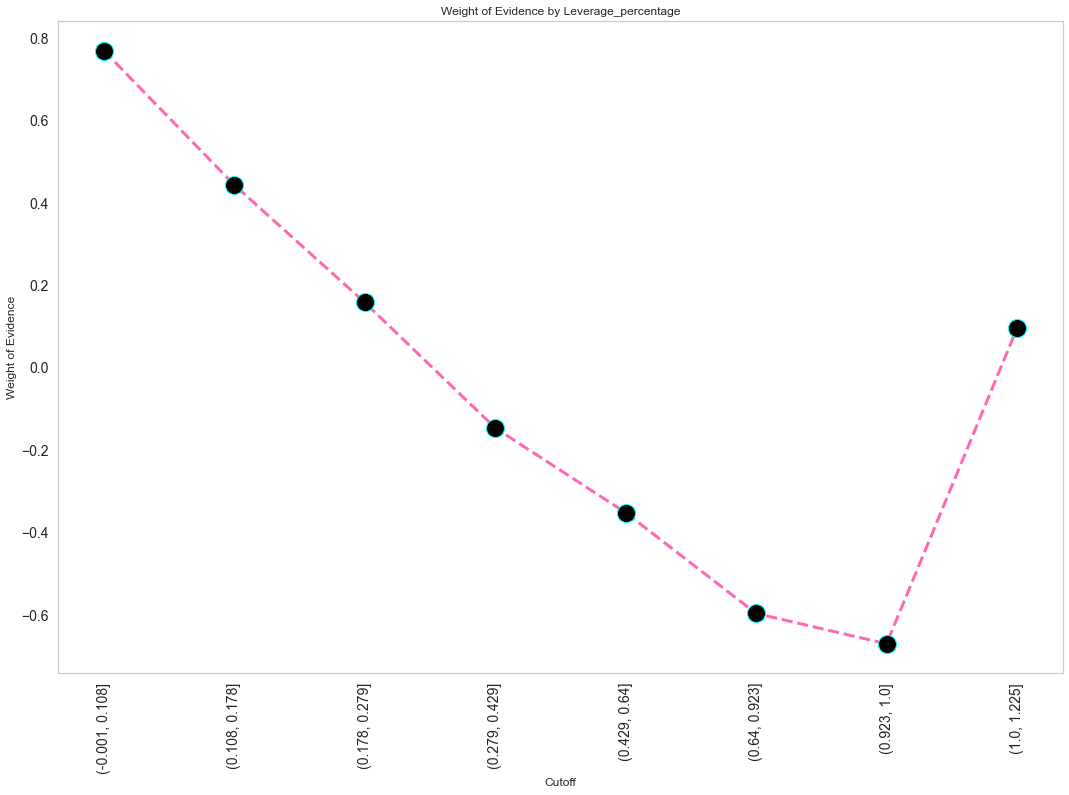

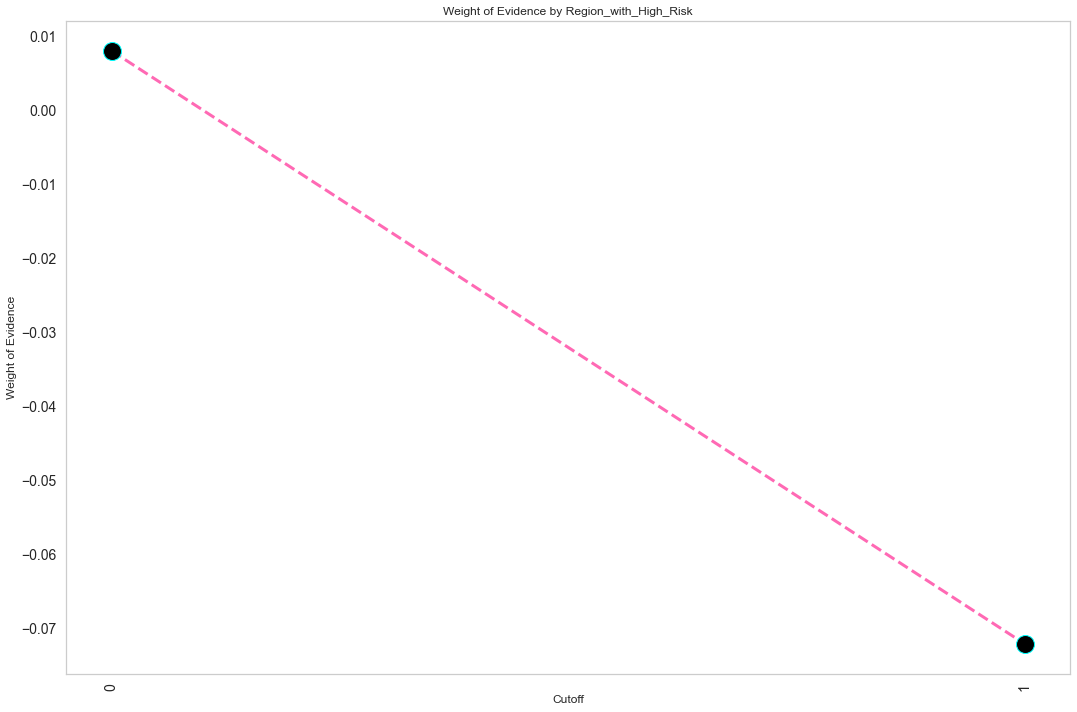

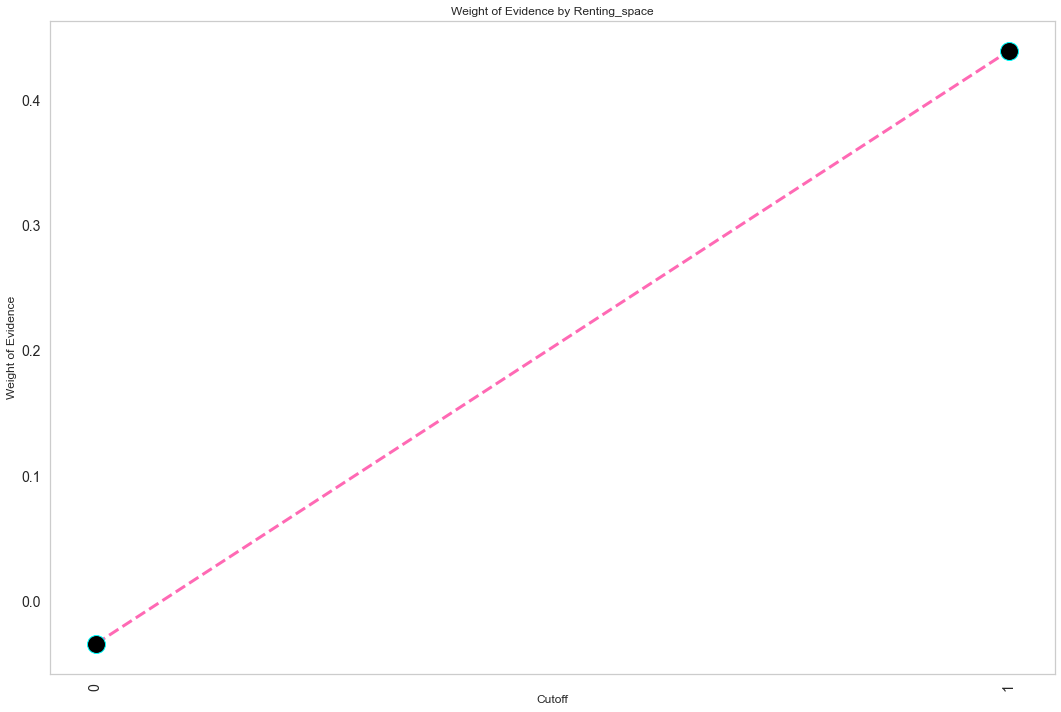

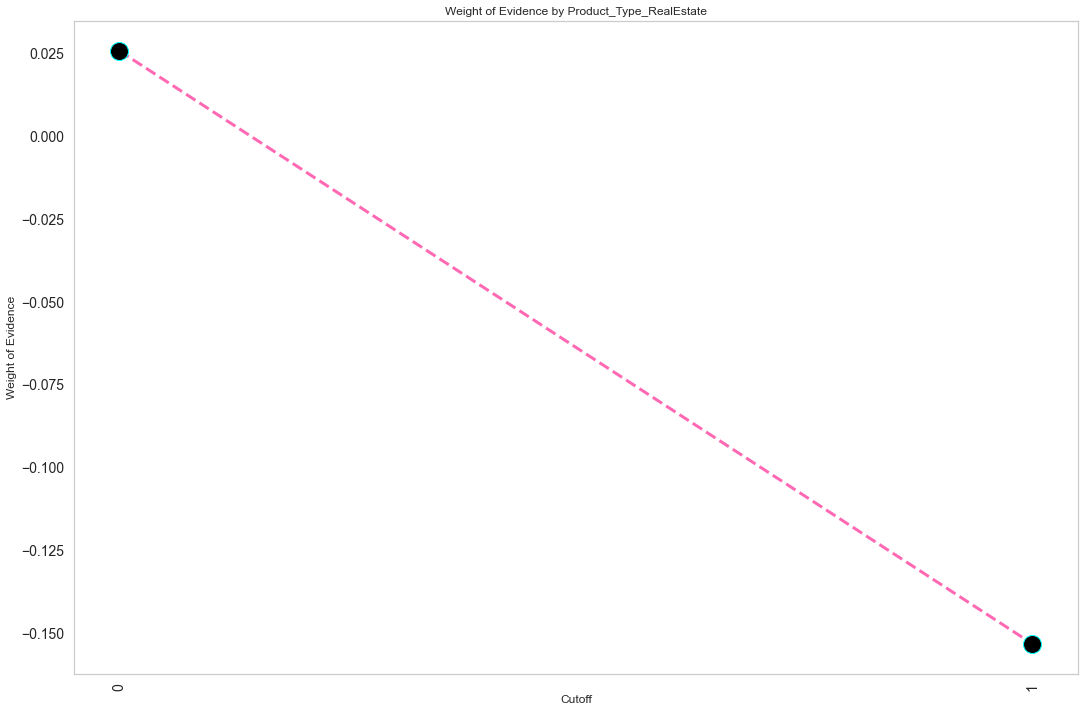

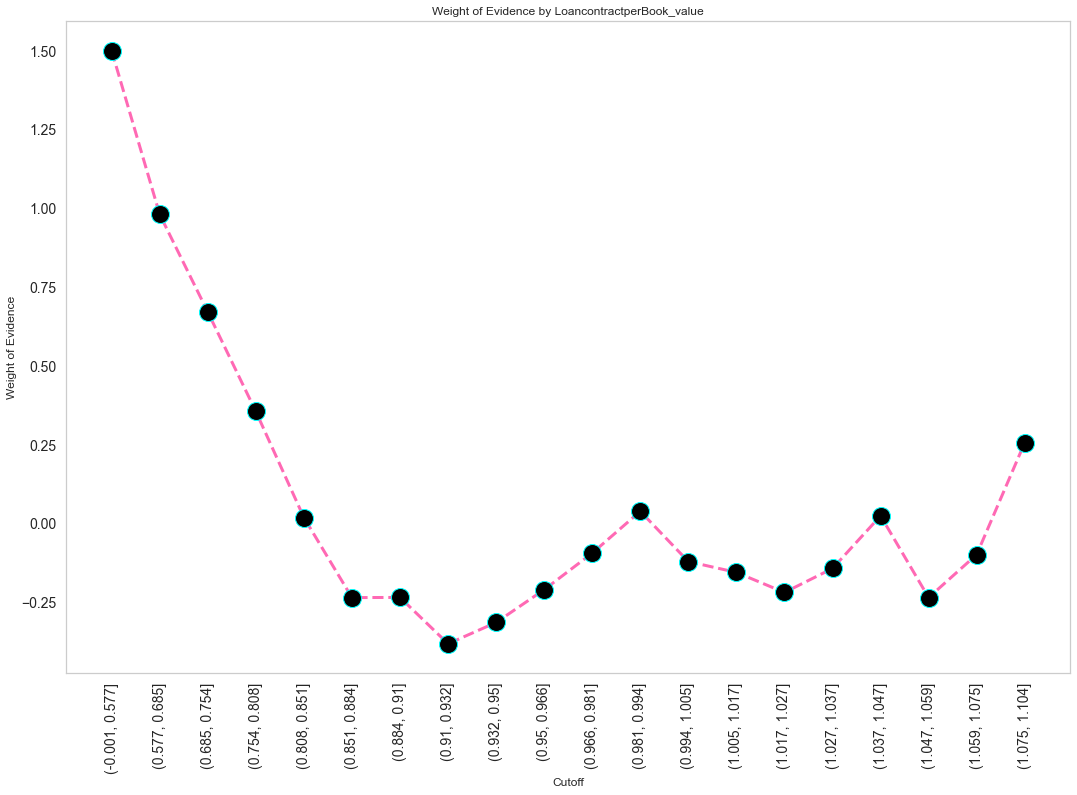

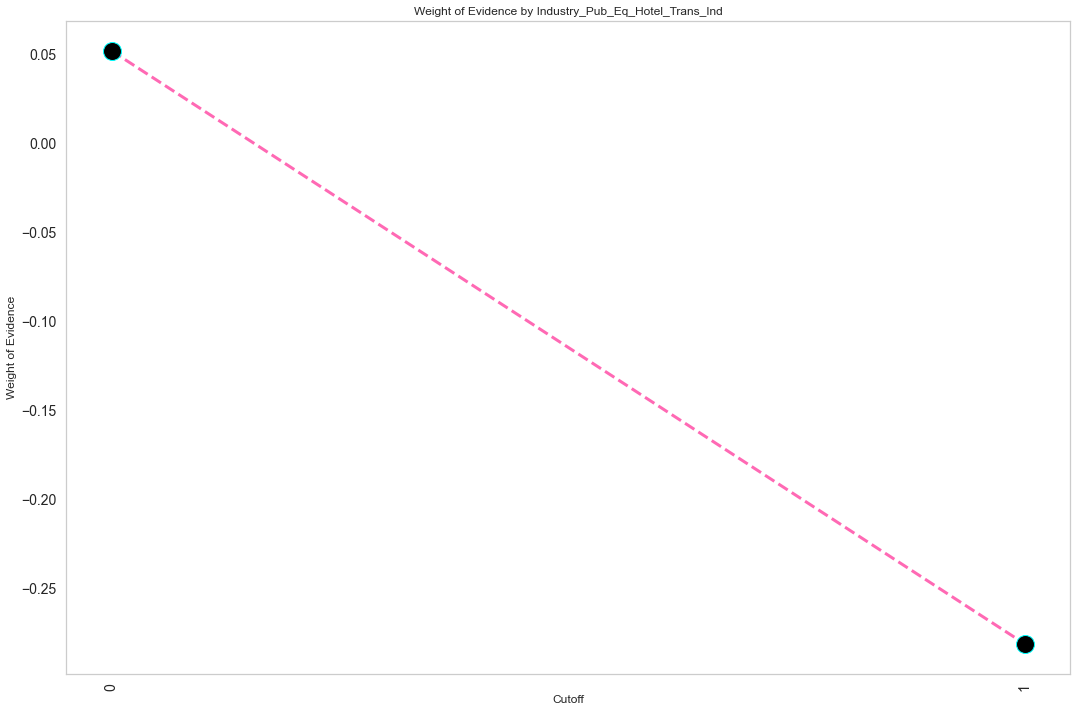

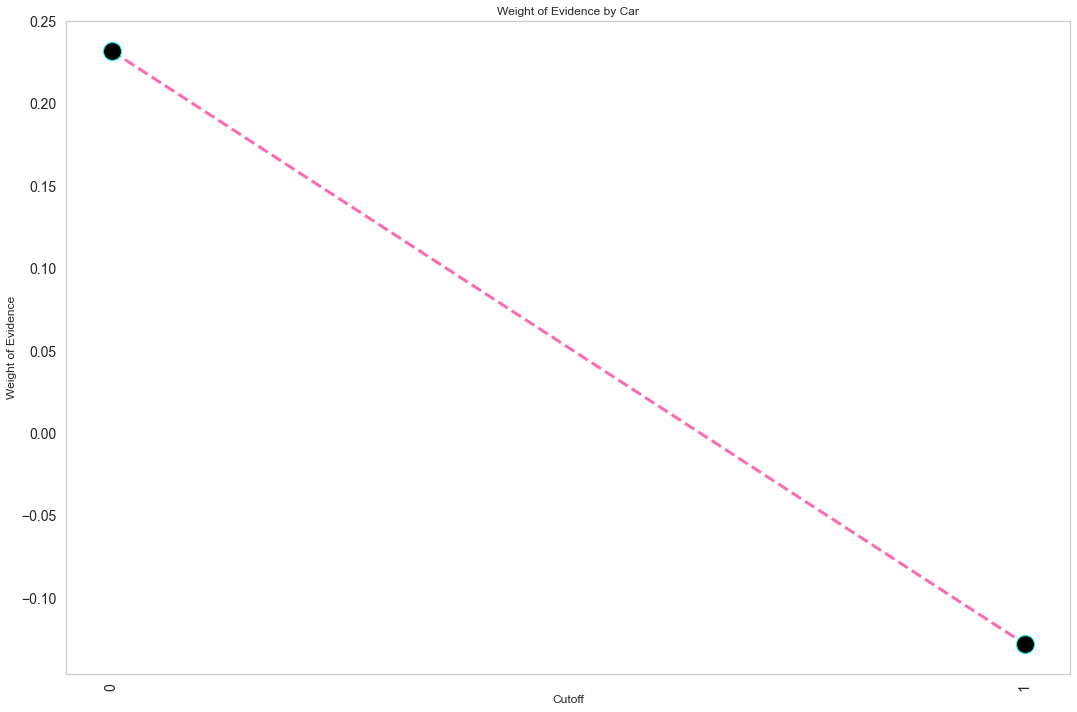

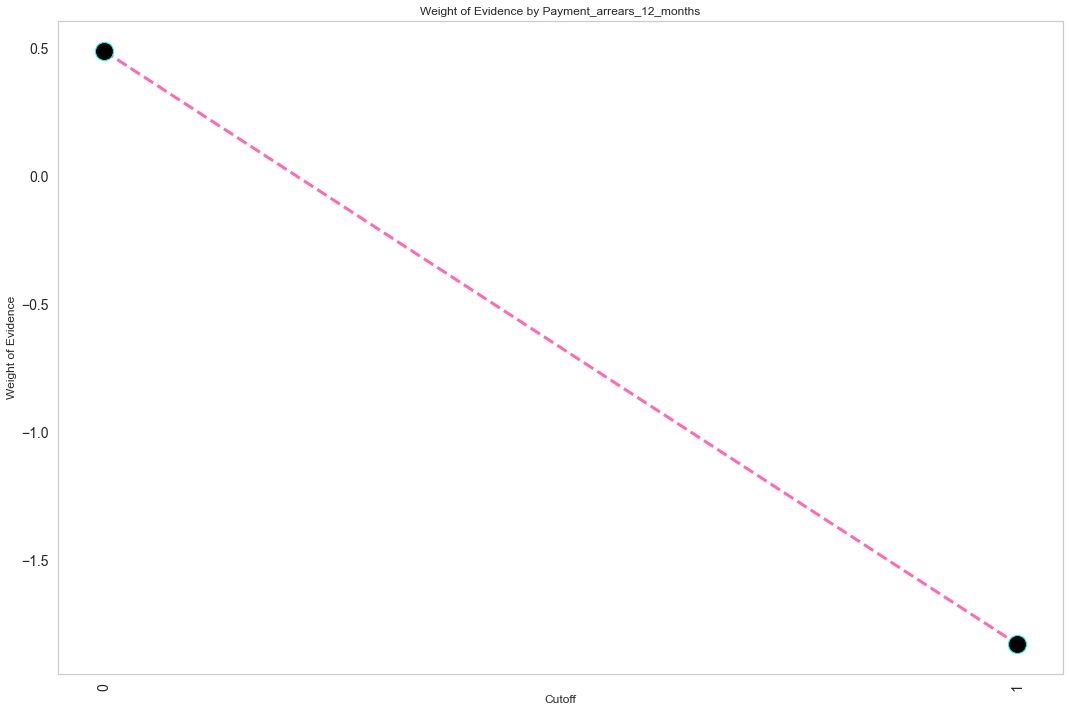

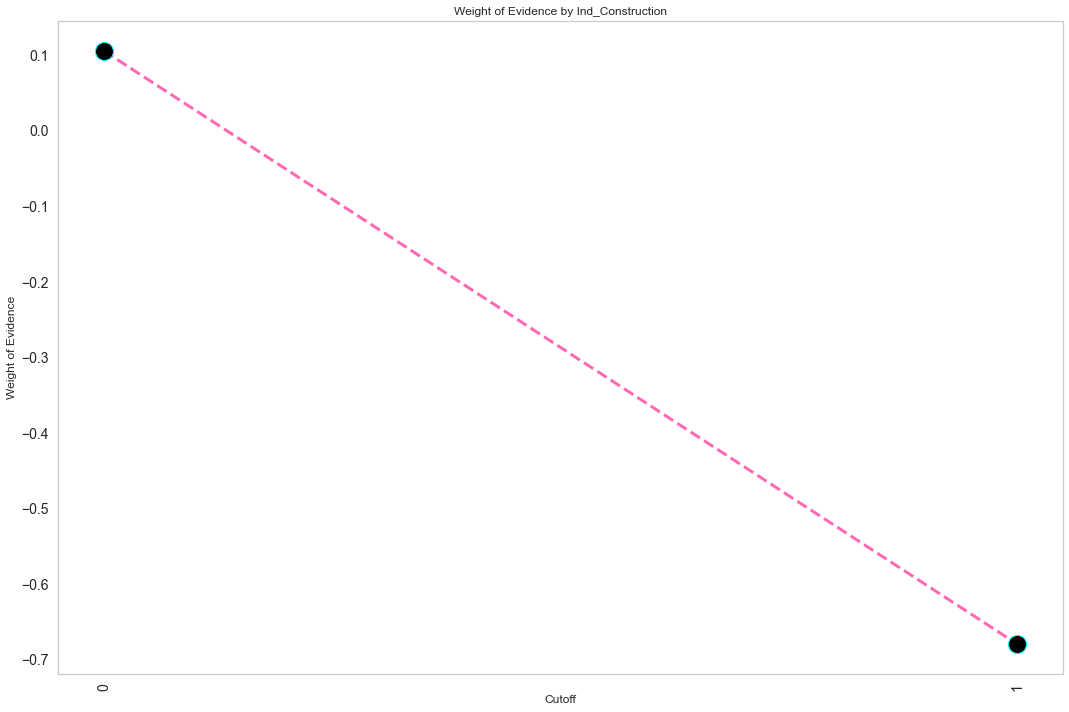

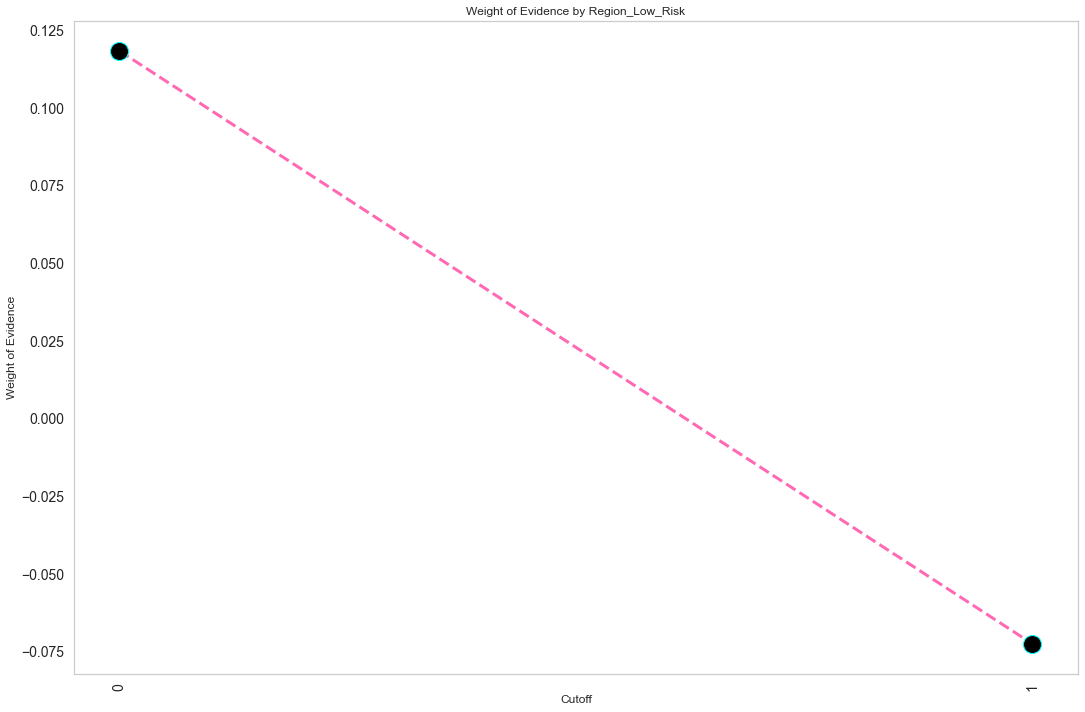

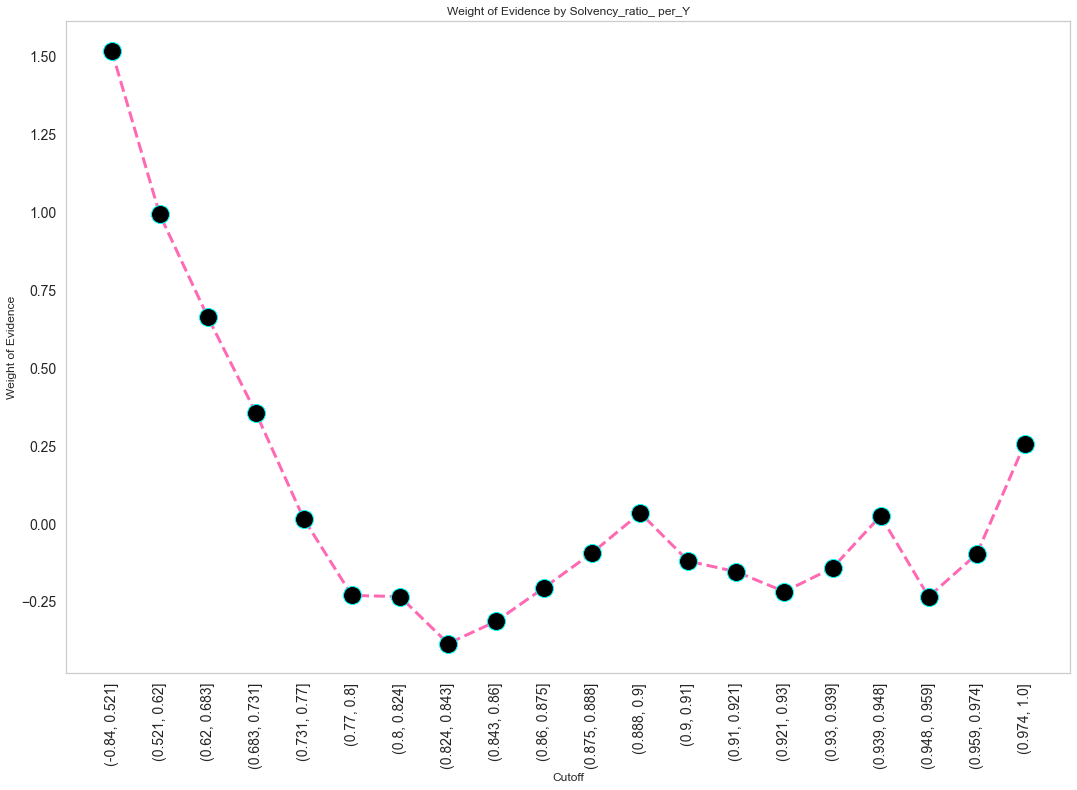

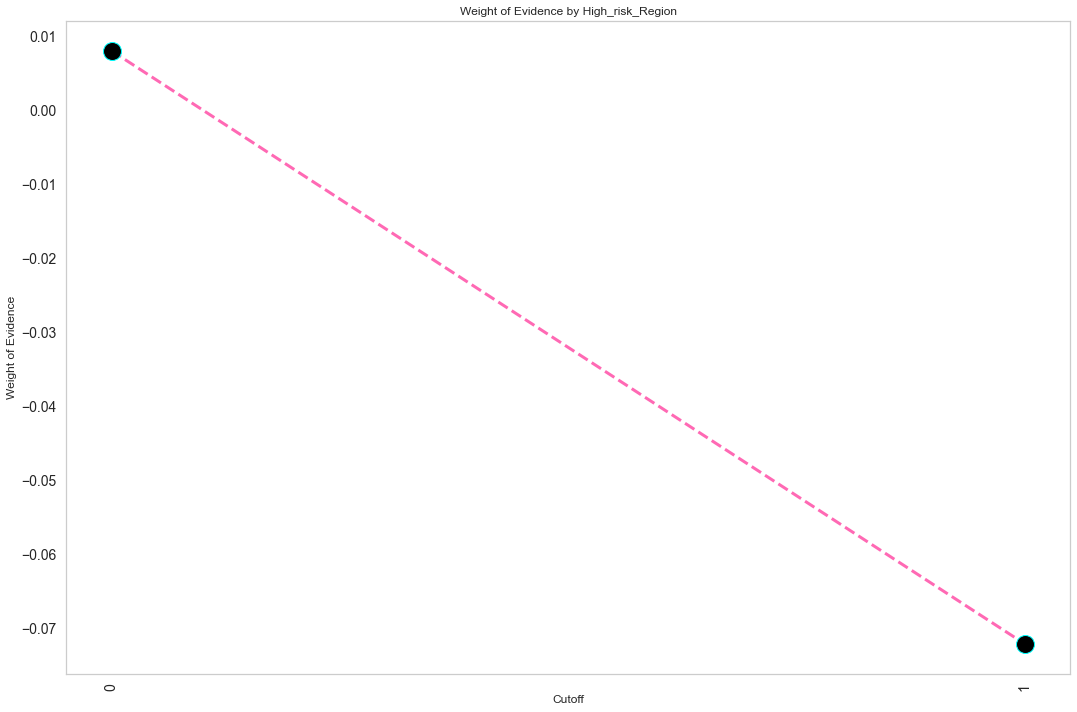

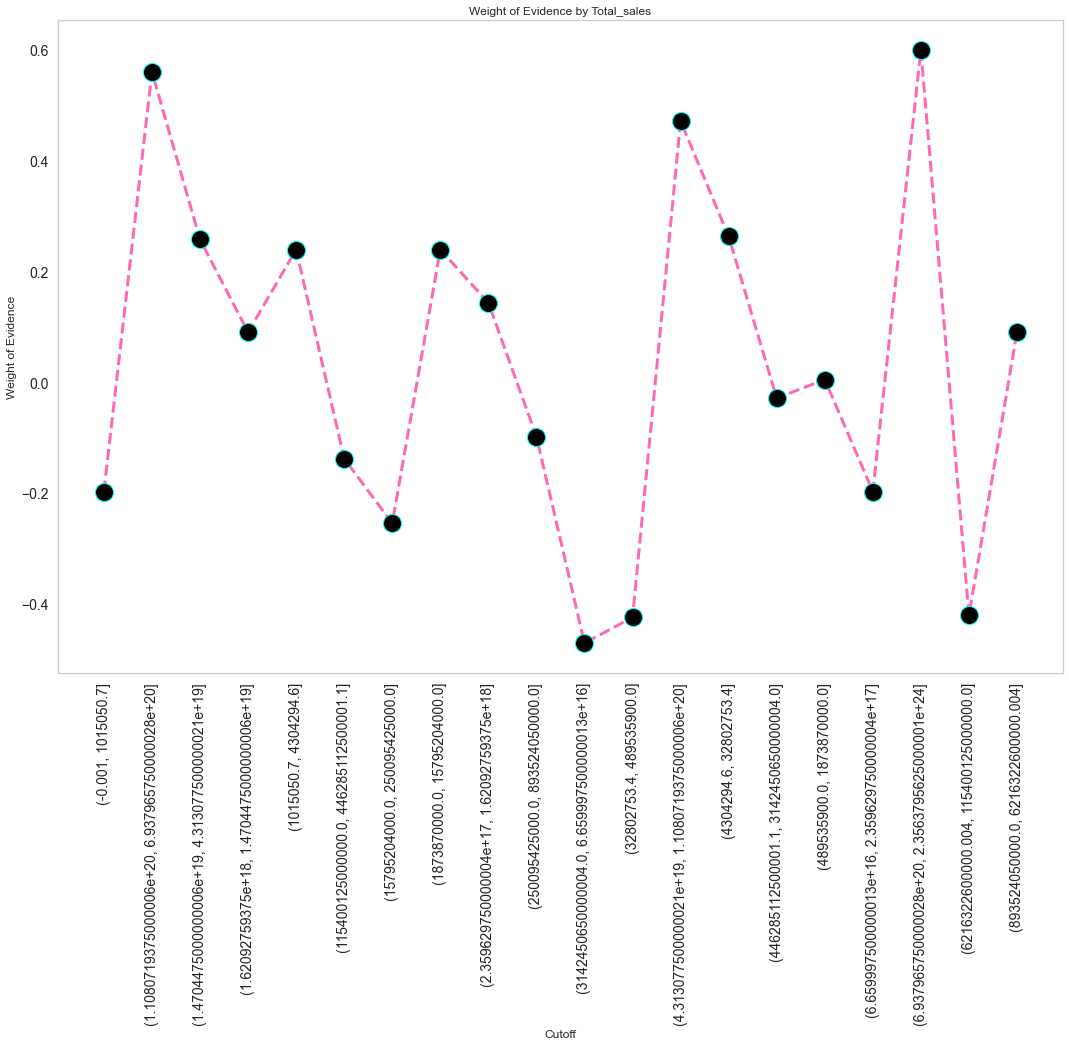

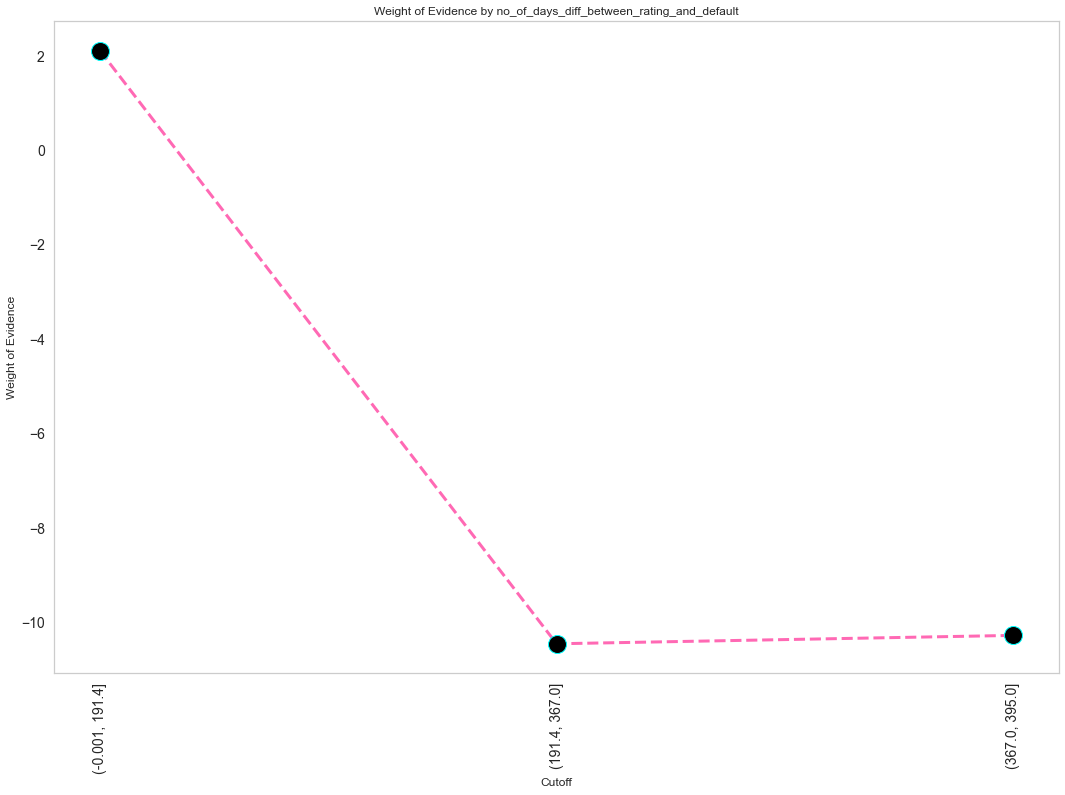

In [15]:
plot_woe_for_all_variables(woe, rotation_of_x_axis_labels=90)

In [16]:
#drop columns with low IV
preprocess_data.drop(columns=['Region_with_High_Risk','Product_Type_RealEstate','Region_Low_Risk',
                             'High_risk_Region','no_of_days_diff_between_rating_and_default'],axis=1,inplace=True)

preprocess_data

Leverage_percentage  Renting_space  LoancontractperBook_value  \
0                 1.224812              0                   0.977766   
1                 0.083600              0                   0.000000   
2                 0.103280              0                   0.875717   
3                 1.224812              0                   0.000000   
4                 0.067200              1                   0.417439   
...                    ...            ...                        ...   
40962             1.224812              0                   1.050846   
40963             1.224812              0                   1.023000   
40964             1.224812              0                   0.969109   
40965             1.224812              0                   0.918427   
40966             1.224812              0                   0.862113   

       Industry_Pub_Eq_Hotel_Trans_Ind  Car  Payment_arrears_12_months  \
0                                    0    1                          0   
1                                    0    0                          0   
2                                    1    1                          0   
3                                    0    0                          0   
4                                    0    0                          0   
...                                ...  ...                        ...   
40962                                0    1                          0   
40963                                0    1                          0   
40964                                0    1                          0   
40965                                0    1                          0   
40966                                0    1                          0   

       Ind_Construction  Solvency_ratio_ per_Y   Total_sales  \
0                     0               0.885257  6.233520e+05   
1                     0               0.000000  9.694880e+05   
2                     0               0.792863  8.364100e+05   
3                     0               0.000000  3.199200e+05   
4                     0              -0.377944  1.567930e+05   
...                 ...                    ...           ...   
40962                 0               0.951422  1.181844e+21   
40963                 0               0.926211  1.745609e+21   
40964                 0               0.877419  1.932125e+21   
40965                 0               0.831532  1.779953e+21   
40966                 0               0.780546  1.625687e+21   

       INTODEFAULT_flag_on12monthsperformancewindow  
0                                                 0  
1                                                 0  
2                                                 0  
3                                                 0  
4                                                 0  
...                                             ...  
40962                                             0  
40963                                             0  
40964                                             0  
40965                                             0  
40966                                             0  

[40967 rows x 10 columns]

In [17]:
# WOE table
woe[woe["Variable"]== "Leverage_percentage"]

Variable           Cutoff      N  Events  % of Events  \
0  Leverage_percentage  (-0.001, 0.108]   2049     115     0.024678   
1  Leverage_percentage   (0.108, 0.178]   2050     156     0.033476   
2  Leverage_percentage   (0.178, 0.279]   2046     202     0.043348   
3  Leverage_percentage   (0.279, 0.429]   2049     265     0.056867   
4  Leverage_percentage    (0.429, 0.64]   2048     316     0.067811   
5  Leverage_percentage    (0.64, 0.923]   2048     387     0.083047   
6  Leverage_percentage     (0.923, 1.0]   2324     466     0.100000   
7  Leverage_percentage     (1.0, 1.225]  26353    2753     0.590773   

   Non-Events  % of Non-Events       WoE        IV  
0        1934         0.053268  0.769418  0.021998  
1        1894         0.052166  0.443595  0.008291  
2        1844         0.050789  0.158430  0.001179  
3        1784         0.049137 -0.146112  0.001130  
4        1732         0.047704 -0.351705  0.007072  
5        1661         0.045749 -0.596245  0.022239  
6        1858         0.051175 -0.669925  0.032709  
7       23600         0.650012  0.095560  0.005661

In [18]:
woe[woe["Variable"]== "LoancontractperBook_value"]

Variable           Cutoff     N  Events  % of Events  \
0   LoancontractperBook_value  (-0.001, 0.577]  2049      57     0.012232   
1   LoancontractperBook_value   (0.577, 0.685]  2048      94     0.020172   
2   LoancontractperBook_value   (0.685, 0.754]  2048     126     0.027039   
3   LoancontractperBook_value   (0.754, 0.808]  2049     169     0.036266   
4   LoancontractperBook_value   (0.808, 0.851]  2048     229     0.049142   
5   LoancontractperBook_value   (0.851, 0.884]  2048     286     0.061373   
6   LoancontractperBook_value    (0.884, 0.91]  2049     286     0.061373   
7   LoancontractperBook_value    (0.91, 0.932]  2048     324     0.069528   
8   LoancontractperBook_value    (0.932, 0.95]  2048     306     0.065665   
9   LoancontractperBook_value    (0.95, 0.966]  2049     280     0.060086   
10  LoancontractperBook_value   (0.966, 0.981]  2048     253     0.054292   
11  LoancontractperBook_value   (0.981, 0.994]  2048     225     0.048283   
12  LoancontractperBook_value   (0.994, 1.005]  2048     259     0.055579   
13  LoancontractperBook_value   (1.005, 1.017]  2049     267     0.057296   
14  LoancontractperBook_value   (1.017, 1.027]  2048     282     0.060515   
15  LoancontractperBook_value   (1.027, 1.037]  2048     264     0.056652   
16  LoancontractperBook_value   (1.037, 1.047]  2049     228     0.048927   
17  LoancontractperBook_value   (1.047, 1.059]  2048     286     0.061373   
18  LoancontractperBook_value   (1.059, 1.075]  2048     254     0.054506   
19  LoancontractperBook_value   (1.075, 1.104]  2049     185     0.039700   

    Non-Events  % of Non-Events       WoE        IV  
0         1992         0.054865  1.500848  0.063987  
1         1954         0.053819  0.981344  0.033019  
2         1922         0.052937  0.671845  0.017400  
3         1880         0.051781  0.356133  0.005525  
4         1819         0.050101  0.019325  0.000019  
5         1762         0.048531 -0.234782  0.003015  
6         1763         0.048558 -0.234215  0.003002  
7         1724         0.047484 -0.381336  0.008406  
8         1742         0.047980 -0.313791  0.005550  
9         1769         0.048723 -0.209615  0.002382  
10        1795         0.049440 -0.093624  0.000454  
11        1823         0.050211  0.039143  0.000075  
12        1789         0.049274 -0.120411  0.000759  
13        1782         0.049081 -0.154752  0.001271  
14        1766         0.048641 -0.218430  0.002594  
15        1784         0.049137 -0.142331  0.001070  
16        1821         0.050156  0.024800  0.000030  
17        1762         0.048531 -0.234782  0.003015  
18        1794         0.049412 -0.098126  0.000500  
19        1864         0.051340  0.257129  0.002993

In [19]:
woe[woe["Variable"]== "Renting_space"]

Variable Cutoff      N  Events  % of Events  Non-Events  \
0  Renting_space      0  37484    4394     0.942918       33090   
1  Renting_space      1   3483     266     0.057082        3217   

   % of Non-Events       WoE        IV  
0         0.911394 -0.034004  0.001072  
1         0.088606  0.439713  0.013861

In [20]:
woe[woe["Variable"]== "Industry_Pub_Eq_Hotel_Trans_Ind"]

Variable Cutoff      N  Events  % of Events  \
0  Industry_Pub_Eq_Hotel_Trans_Ind      0  35220    3825     0.820815   
1  Industry_Pub_Eq_Hotel_Trans_Ind      1   5747     835     0.179185   

   Non-Events  % of Non-Events       WoE        IV  
0       31395         0.864709  0.052095  0.002287  
1        4912         0.135291 -0.280990  0.012334

In [21]:
woe[woe["Variable"]== "Car"]

Variable Cutoff      N  Events  % of Events  Non-Events  % of Non-Events  \
0      Car      0  15873    1466     0.314592       14407         0.396811   
1      Car      1  25094    3194     0.685408       21900         0.603189   

        WoE        IV  
0  0.232181  0.019090  
1 -0.127783  0.010506

In [22]:
woe[woe["Variable"]== "Payment_arrears_12_months"]

Variable Cutoff      N  Events  % of Events  Non-Events  \
0  Payment_arrears_12_months      0  36445    2656     0.569957       33789   
1  Payment_arrears_12_months      1   4522    2004     0.430043        2518   

   % of Non-Events       WoE        IV  
0         0.930647  0.490319  0.176853  
1         0.069353 -1.824675  0.658142

In [23]:
woe[woe["Variable"]== "Ind_Construction"]

Variable Cutoff      N  Events  % of Events  Non-Events  \
0  Ind_Construction      0  36704    3799     0.815236       32905   
1  Ind_Construction      1   4263     861     0.184764        3402   

   % of Non-Events       WoE        IV  
0         0.906299  0.105892  0.009643  
1         0.093701 -0.678971  0.061829

In [24]:
woe[woe["Variable"]== "Solvency_ratio_ per_Y"]

Variable          Cutoff     N  Events  % of Events  \
0   Solvency_ratio_ per_Y  (-0.84, 0.521]  2049      56     0.012017   
1   Solvency_ratio_ per_Y   (0.521, 0.62]  2048      93     0.019957   
2   Solvency_ratio_ per_Y   (0.62, 0.683]  2048     127     0.027253   
3   Solvency_ratio_ per_Y  (0.683, 0.731]  2049     169     0.036266   
4   Solvency_ratio_ per_Y   (0.731, 0.77]  2048     230     0.049356   
5   Solvency_ratio_ per_Y     (0.77, 0.8]  2048     285     0.061159   
6   Solvency_ratio_ per_Y    (0.8, 0.824]  2049     286     0.061373   
7   Solvency_ratio_ per_Y  (0.824, 0.843]  2048     325     0.069742   
8   Solvency_ratio_ per_Y   (0.843, 0.86]  2048     306     0.065665   
9   Solvency_ratio_ per_Y   (0.86, 0.875]  2049     279     0.059871   
10  Solvency_ratio_ per_Y  (0.875, 0.888]  2048     253     0.054292   
11  Solvency_ratio_ per_Y    (0.888, 0.9]  2048     226     0.048498   
12  Solvency_ratio_ per_Y     (0.9, 0.91]  2048     259     0.055579   
13  Solvency_ratio_ per_Y   (0.91, 0.921]  2049     267     0.057296   
14  Solvency_ratio_ per_Y   (0.921, 0.93]  2048     282     0.060515   
15  Solvency_ratio_ per_Y   (0.93, 0.939]  2048     264     0.056652   
16  Solvency_ratio_ per_Y  (0.939, 0.948]  2049     228     0.048927   
17  Solvency_ratio_ per_Y  (0.948, 0.959]  2048     286     0.061373   
18  Solvency_ratio_ per_Y  (0.959, 0.974]  2048     254     0.054506   
19  Solvency_ratio_ per_Y    (0.974, 1.0]  2049     185     0.039700   

    Non-Events  % of Non-Events       WoE        IV  
0         1993         0.054893  1.519050  0.065131  
1         1955         0.053846  0.992551  0.033637  
2         1921         0.052910  0.663419  0.017021  
3         1880         0.051781  0.356133  0.005525  
4         1818         0.050073  0.014418  0.000010  
5         1763         0.048558 -0.230712  0.002907  
6         1763         0.048558 -0.234215  0.003002  
7         1723         0.047456 -0.384998  0.008580  
8         1742         0.047980 -0.313791  0.005550  
9         1770         0.048751 -0.205472  0.002285  
10        1795         0.049440 -0.093624  0.000454  
11        1822         0.050183  0.034160  0.000058  
12        1789         0.049274 -0.120411  0.000759  
13        1782         0.049081 -0.154752  0.001271  
14        1766         0.048641 -0.218430  0.002594  
15        1784         0.049137 -0.142331  0.001070  
16        1821         0.050156  0.024800  0.000030  
17        1762         0.048531 -0.234782  0.003015  
18        1794         0.049412 -0.098126  0.000500  
19        1864         0.051340  0.257129  0.002993

In [25]:
woe[woe["Variable"]== "Total_sales"]

Variable                                           Cutoff     N  \
0   Total_sales                              (-0.001, 1015050.7]  2049   
1   Total_sales  (1.1080719375000006e+20, 6.937965750000028e+20]  2048   
2   Total_sales  (1.4704475000000006e+19, 4.313077500000021e+19]  2049   
3   Total_sales      (1.62092759375e+18, 1.4704475000000006e+19]  2048   
4   Total_sales                           (1015050.7, 4304294.6]  2048   
5   Total_sales           (115400125000000.0, 446285112500001.1]  2048   
6   Total_sales                  (15795204000.0, 250095425000.0]  2049   
7   Total_sales                    (1873870000.0, 15795204000.0]  2048   
8   Total_sales       (2.359629750000004e+17, 1.62092759375e+18]  2048   
9   Total_sales                 (250095425000.0, 893524050000.0]  2048   
10  Total_sales      (3142450650000004.0, 6.659997500000013e+16]  2048   
11  Total_sales                        (32802753.4, 489535900.0]  2049   
12  Total_sales  (4.313077500000021e+19, 1.1080719375000006e+20]  2048   
13  Total_sales                          (4304294.6, 32802753.4]  2048   
14  Total_sales          (446285112500001.1, 3142450650000004.0]  2048   
15  Total_sales                      (489535900.0, 1873870000.0]  2048   
16  Total_sales   (6.659997500000013e+16, 2.359629750000004e+17]  2049   
17  Total_sales  (6.937965750000028e+20, 2.3563795625000001e+24]  2049   
18  Total_sales           (6216322600000.004, 115400125000000.0]  2049   
19  Total_sales              (893524050000.0, 6216322600000.004]  2048   

    Events  % of Events  Non-Events  % of Non-Events       WoE        IV  
0      277     0.059442        1772         0.048806 -0.197148  0.002097  
1      140     0.030043        1908         0.052552  0.559173  0.012586  
2      185     0.039700        1864         0.051340  0.257129  0.002993  
3      215     0.046137        1833         0.050486  0.090076  0.000392  
4      188     0.040343        1860         0.051230  0.238895  0.002601  
5      263     0.056438        1785         0.049164 -0.137975  0.001004  
6      291     0.062446        1758         0.048420 -0.254386  0.003568  
7      188     0.040343        1860         0.051230  0.238895  0.002601  
8      205     0.043991        1843         0.050762  0.143145  0.000969  
9      254     0.054506        1794         0.049412 -0.098126  0.000500  
10     349     0.074893        1699         0.046795 -0.470272  0.013213  
11     336     0.072103        1713         0.047181 -0.424105  0.010570  
12     152     0.032618        1896         0.052221  0.470626  0.009226  
13     184     0.039485        1864         0.051340  0.262549  0.003113  
14     239     0.051288        1809         0.049825 -0.028929  0.000042  
15     232     0.049785        1816         0.050018  0.004659  0.000001  
16     277     0.059442        1772         0.048806 -0.197148  0.002097  
17     135     0.028970        1914         0.052717  0.598681  0.014217  
18     335     0.071888        1714         0.047209 -0.420541  0.010379  
19     215     0.046137        1833         0.050486  0.090076  0.000392

In [26]:
dff = preprocess_data

### Creating categories (new features) based on their WOE and number of observations

In [27]:
#Leverage_percentage
dff['Leverage_percentage:<0.429']= np.where((dff['Leverage_percentage']<=0.429),1,0)
dff['Leverage_percentage:>0.429']= np.where((dff['Leverage_percentage']>0.429),1,0)

In [28]:
#Renting_space
dff['Renting_space:1']= np.where((dff['Renting_space']==1),1,0)
dff['Renting_space:0']= np.where((dff['Renting_space']==0),1,0)

#Industry_Pub_Eq_Hotel_Trans_Ind
dff['Industry_Pub_Eq_Hotel_Trans_Ind:1']= np.where((dff['Industry_Pub_Eq_Hotel_Trans_Ind']==1),1,0)
dff['Industry_Pub_Eq_Hotel_Trans_Ind:0']= np.where((dff['Industry_Pub_Eq_Hotel_Trans_Ind']==0),1,0)

#Car
dff['Car:1']= np.where((dff['Car']==1),1,0)
dff['Car:0']= np.where((dff['Car']==0),1,0)

#Payment_arrears_12_months
dff['Payment_arrears_12_months:1']= np.where((dff['Payment_arrears_12_months']==1),1,0)
dff['Payment_arrears_12_months:0']= np.where((dff['Payment_arrears_12_months']==0),1,0)

#Ind_Construction
dff['Ind_Construction:1']= np.where((dff['Ind_Construction']==1),1,0)
dff['Ind_Construction:0']= np.where((dff['Ind_Construction']==0),1,0)

In [29]:
#LoancontractperBook_value
dff['LoancontractperBook_value:<0.808']= np.where((dff['LoancontractperBook_value']<=0.808),1,0)
dff['LoancontractperBook_value:0.808-0.932']= np.where((dff['LoancontractperBook_value']>0.808)&(dff['LoancontractperBook_value']<=0.932),1,0)
dff['LoancontractperBook_value:0.932-0.994']= np.where((dff['LoancontractperBook_value']>0.932)&(dff['LoancontractperBook_value']<=0.994),1,0)
dff['LoancontractperBook_value:0.994-1.037']= np.where((dff['LoancontractperBook_value']>0.994)&(dff['LoancontractperBook_value']<=1.037),1,0)
dff['LoancontractperBook_value>1.037']= np.where((dff['LoancontractperBook_value']>1.037),1,0)


In [30]:
#Solvency_ratio_ per_Y
dff['Solvency_ratio_ per_Y:<0.731']= np.where((dff['Solvency_ratio_ per_Y']<=0.731),1,0)
dff['Solvency_ratio_ per_Y:0.731-0.843']= np.where((dff['Solvency_ratio_ per_Y']>0.731)&(dff['Solvency_ratio_ per_Y']<=0.843),1,0)
dff['Solvency_ratio_ per_Y:0.843-0.9']= np.where((dff['Solvency_ratio_ per_Y']>0.843)&(dff['Solvency_ratio_ per_Y']<=0.9),1,0)
dff['Solvency_ratio_ per_Y:0.9-0.939']= np.where((dff['Solvency_ratio_ per_Y']>0.9)&(dff['Solvency_ratio_ per_Y']<=0.939),1,0)
dff['Solvency_ratio_ per_Y>0.939']= np.where((dff['Solvency_ratio_ per_Y']>0.939),1,0)


In [31]:
##Total_sales
dff['Total_sales:<489535900.0']= np.where((dff['Total_sales']<=489535900.0),1,0)
dff['Total_sales:489535900.0-893524050000.0']= np.where((dff['Total_sales']>489535900.0)&(dff['Total_sales']<=893524050000.0),1,0)
dff['Total_sales:893524050000.0-3142450650000004.0']= np.where((dff['Total_sales']>893524050000.0)&(dff['Total_sales']<=3142450650000004.0),1,0)
dff['Total_sales:3142450650000004.0-1.4704475000000006e+19']= np.where((dff['Total_sales']>3142450650000004.0)&(dff['Total_sales']<=1.4704475000000006e+19),1,0)
dff['Total_sales>1.4704475000000006e+19']= np.where((dff['Total_sales']>1.4704475000000006e+19),1,0)


In [32]:
dff1= dff.drop(['Leverage_percentage', 'Renting_space','Industry_Pub_Eq_Hotel_Trans_Ind','LoancontractperBook_value', 'Car','Ind_Construction',
      'Payment_arrears_12_months' ,'Solvency_ratio_ per_Y', 'Total_sales'],axis=1)

dff1

INTODEFAULT_flag_on12monthsperformancewindow  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
40962                                             0   
40963                                             0   
40964                                             0   
40965                                             0   
40966                                             0   

       Leverage_percentage:<0.429  Leverage_percentage:>0.429  \
0                               0                           1   
1                               1                           0   
2                               1                           0   
3                               0                           1   
4                               1                           0   
...                           ...                         ...   
40962                           0                           1   
40963                           0                           1   
40964                           0                           1   
40965                           0                           1   
40966                           0                           1   

       Renting_space:1  Renting_space:0  Industry_Pub_Eq_Hotel_Trans_Ind:1  \
0                    0                1                                  0   
1                    0                1                                  0   
2                    0                1                                  1   
3                    0                1                                  0   
4                    1                0                                  0   
...                ...              ...                                ...   
40962                0                1                                  0   
40963                0                1                                  0   
40964                0                1                                  0   
40965                0                1                                  0   
40966                0                1                                  0   

       Industry_Pub_Eq_Hotel_Trans_Ind:0  Car:1  Car:0  \
0                                      1      1      0   
1                                      1      0      1   
2                                      0      1      0   
3                                      1      0      1   
4                                      1      0      1   
...                                  ...    ...    ...   
40962                                  1      1      0   
40963                                  1      1      0   
40964                                  1      1      0   
40965                                  1      1      0   
40966                                  1      1      0   

       Payment_arrears_12_months:1  ...  Solvency_ratio_ per_Y:<0.731  \
0                                0  ...                             0   
1                                0  ...                             1   
2                                0  ...                             0   
3                                0  ...                             1   
4                                0  ...                             1   
...                            ...  ...                           ...   
40962                            0  ...                             0   
40963                            0  ...                             0   
40964                            0  ...                             0   
40965                            0  ...                             0   
40966                            0  ...                             0   

       Solvency_ratio_ per_Y:0.731-0.843  Solvency_rat

#### Now we must remove 1 dummy variable for each original variable, otherwise we will get into the dummy variable trap. The dummy variables to be removed are those with the lowest WOE

In [33]:
#dummy categories to drop
ref_categories =['Leverage_percentage:>0.429','Renting_space:0','Industry_Pub_Eq_Hotel_Trans_Ind:1',
                'Car:1','Payment_arrears_12_months:1','Ind_Construction:1','LoancontractperBook_value:0.808-0.932',
                'Solvency_ratio_ per_Y:0.731-0.843','Total_sales:893524050000.0-3142450650000004.0']

dff1.drop(columns=ref_categories, inplace=True, axis=1)

dff1

INTODEFAULT_flag_on12monthsperformancewindow  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
40962                                             0   
40963                                             0   
40964                                             0   
40965                                             0   
40966                                             0   

       Leverage_percentage:<0.429  Renting_space:1  \
0                               0                0   
1                               1                0   
2                               1                0   
3                               0                0   
4                               1                1   
...                           ...              ...   
40962                           0                0   
40963                           0                0   
40964                           0                0   
40965                           0                0   
40966                           0                0   

       Industry_Pub_Eq_Hotel_Trans_Ind:0  Car:0  Payment_arrears_12_months:0  \
0                                      1      0                            1   
1                                      1      1                            1   
2                                      0      0                            1   
3                                      1      1                            1   
4                                      1      1                            1   
...                                  ...    ...                          ...   
40962                                  1      0                            1   
40963                                  1      0                            1   
40964                                  1      0                            1   
40965                                  1      0                            1   
40966                                  1      0                            1   

       Ind_Construction:0  LoancontractperBook_value:<0.808  \
0                       1                                 0   
1                       1                                 1   
2                       1                                 0   
3                       1                                 1   
4                       1                                 1   
...                   ...                               ...   
40962                   1                                 0   
40963                   1                                 0   
40964                   1                                 0   
40965                   1                                 0   
40966                   1                                 0   

       LoancontractperBook_value:0.932-0.994  \
0                                          1   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
40962                                      0   
40963                                      0   
40964                                      1   
40965                                      0   
40966                                      0   

       LoancontractperBook_value:0.994-1.037  LoancontractperBook_value>1.037  \
0                                          0                                0   
1                                          0                                0   
2                                          0                                0   
3                                          0                                0 

In [34]:
#Identify independent and dependent variable
X= dff1.drop(columns='INTODEFAULT_flag_on12monthsperformancewindow', axis=1)
y = dff1['INTODEFAULT_flag_on12monthsperformancewindow']

In [35]:
#Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from itertools import combinations

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [37]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000, C=1.0)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [40]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 89.43%


In [41]:
# Accessing coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-0.11664012  0.04370907 -0.10634951 -0.1038902  -0.75552218 -0.21246965
   0.01602788  0.01861905 -0.3562008  -0.67132701 -0.54853001  0.05112223
   0.48269486  0.79293684  0.0336592  -0.01108447 -0.04400184 -0.23070846]]
Intercept: [-2.43398027]


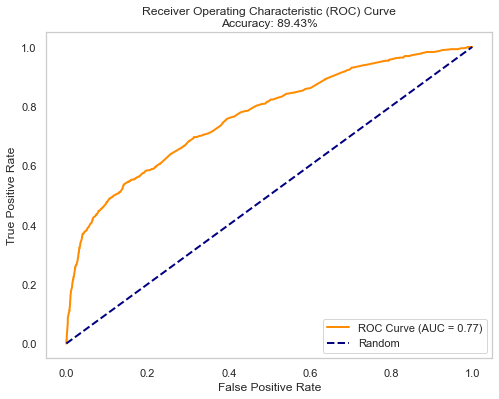

In [42]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy * 100))
plt.legend(loc="lower right")
plt.show()

In [43]:
# Calculate Gini coefficient
gini = 2 * roc_auc_score(y_test, y_prob) - 1
print("Gini coefficient:", gini)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc_auc)

# Calculate KS statistic
ks = max(tpr - fpr)
print("KS statistic:", ks)

Gini coefficient: 0.5310981993848489
ROC AUC: 0.7655490996924245
KS statistic: 0.3947628314647045


In [44]:
# Calculate Pietra Index
pietra_index= (ks*(2**0.5))/4
print("Pietra index:", pietra_index)

Pietra index: 0.13956973754454738


In [45]:
#Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[7088  158]
 [ 708  240]]


In [46]:
#Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7246
           1       0.60      0.25      0.36       948

    accuracy                           0.89      8194
   macro avg       0.76      0.62      0.65      8194
weighted avg       0.87      0.89      0.87      8194



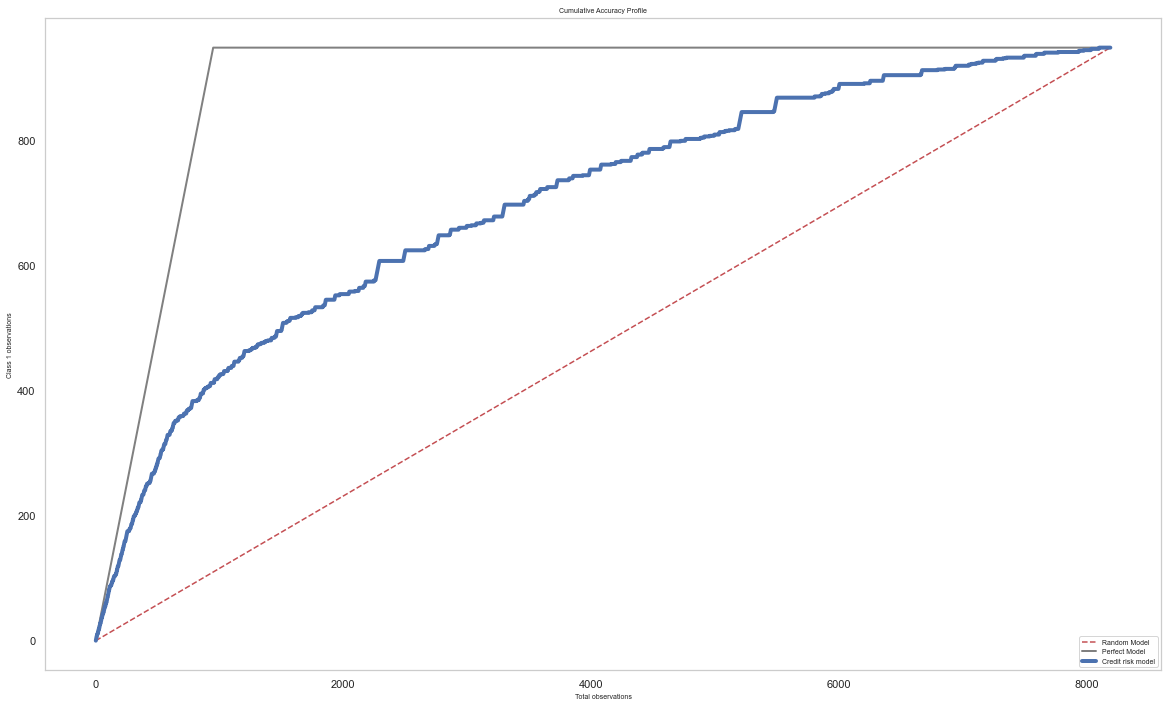

In [47]:
# CAP
total = len(y_test)
class_1_count = np.sum(y_test)
class_0_count = total - class_1_count
plt.figure(figsize = (20, 12))

# Random Model
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')

# Perfect Model
plt.plot([0, class_1_count, total], 
         [0, class_1_count, class_1_count], 
         c = 'grey', 
         linewidth = 2, 
         label = 'Perfect Model')

# Trained Model

probs = y_prob
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)
plt.plot(x_values, 
         y_values, 
         c = 'b', 
         label = 'Credit risk model', 
         linewidth = 4)

# Plot information
plt.xlabel('Total observations', fontsize = 7)
plt.ylabel('Class 1 observations', fontsize = 7)
plt.title('Cumulative Accuracy Profile', fontsize = 7)
plt.legend(loc = 'lower right', fontsize = 7)

In [48]:
from scipy.stats import entropy
from scipy.stats import chi2
from sklearn.metrics import precision_recall_curve
from scipy.stats import chi2_contingency
from sklearn.metrics import brier_score_loss
from scipy import stats
import plotly.graph_objects as go
from scipy.stats import binom_test, chisquare
from scipy.stats import chi2_contingency, chisquare
from sklearn.calibration import calibration_curve, CalibrationDisplay

In [49]:
#Brier score
brier_score_loss = brier_score_loss(y_test,y_prob)
print("{} : {:.4f}".format("Brier Score Loss", brier_score_loss))

Brier Score Loss : 0.0846


In [50]:
# Kendalltau
res = stats.kendalltau(y_test, y_prob)
kendalltau= res.correlation
print("{} : {:.4f}".format("Kendall's Tau", kendalltau))

Kendall's Tau : 0.2415


In [51]:
# Function to calculate concordant and discordant pairs
def count_pairs(y_true, y_scores):
    concordant = discordant = 0
    for (i, j) in combinations(range(len(y_true)), 2):
        if y_scores[i] != y_scores[j]:
            if (y_scores[i] > y_scores[j]) == (y_true.iloc[i] > y_true.iloc[j]):
                concordant += 1
            else:
                discordant += 1
    return concordant, discordant

In [52]:
concordant, discordant = count_pairs(y_test, y_prob)
total_pairs = concordant + discordant

# Calculate Somer's D and Gamma
somer_d = 2 * (concordant / total_pairs) - 1
gamma = (concordant - discordant) / (concordant + discordant)
somer_d, gamma
print("{} : {:.4f}".format("Somer's D", somer_d))
print("{} : {:.4f}".format("Gamma", gamma))

Somer's D : 0.1052
Gamma : 0.1052


In [53]:
#unconditional entropy
def entropy(Y):
    unique, count = np.unique(Y, return_counts=True, axis=0)
    prob = count / len(Y)
    en = np.sum((-1) * prob * np.log2(prob))
    return en
unconditional_entropy = entropy(y_test)
print("Unconditional entropy:", unconditional_entropy)

Unconditional entropy: 0.5168566161695773


In [54]:
#conditional entropy
def jEntropy(Y, X):
    YX = np.c_[Y, X]  
    return entropy(YX)

def cEntropy(Y, X):
    return jEntropy(Y, X) - entropy(X)

y_prob_discrete = np.digitize(y_prob, bins=np.linspace(0, 1, num=11)) - 1  

# Calculate the joint entropy of y_test and the discretized y_prob
joint_entropy_yx = jEntropy(y_test, y_prob_discrete)
print(f"Joint Entropy: {joint_entropy_yx}")

# Calculate the conditional entropy of y_test given the discretized y_prob
conditional_entropy = cEntropy(y_test, y_prob_discrete)
print(f"Conditional Entropy: {conditional_entropy}")

Joint Entropy: 1.787618502767395
Conditional Entropy: 0.4354990826742928


In [55]:
#KL divergence and CIER
KL_divergence= unconditional_entropy-conditional_entropy
CIER= (unconditional_entropy-conditional_entropy)/unconditional_entropy
print("{} : {:.4f}".format("KL Divergence", KL_divergence))
print("{} : {:.4f}".format("CIER", CIER))

KL Divergence : 0.0814
CIER : 0.1574


In [56]:
# Cohen's d statistic 
def calculate_cohens_d(y_true, y_pred):
    mean_diff = np.mean(y_true) - np.mean(y_pred)
    pooled_std = np.sqrt((np.var(y_true) + np.var(y_pred)) / 2)
    cohens_d = mean_diff / pooled_std
    
    return cohens_d

cohens_d = calculate_cohens_d(y_test,y_prob)
print("{}: {:.4f}".format("Cohen's d", cohens_d))

Cohen's d: 0.0022


In [57]:
# KS statistics 
def k_s_statistics_gain_lift(data,predicted_probability,ground_truth,response_name='default'):
    data= data.sort_values(by=predicted_probability, ascending=False)
    data['decile_group'] = pd.qcut(data[predicted_probability], q=10)
    KS_data = data.groupby('decile_group').agg( 
            [
                'count', 
                'sum', 
            ]
            )[ground_truth].sort_index(ascending=False)
    KS_data.columns = ['Total count','Number of '+response_name]
    KS_data['Number of '+'Non-'+response_name]=KS_data['Total count']-KS_data['Number of '+response_name]
    KS_data[response_name+'_Rate'+'%'] = (KS_data['Number of '+response_name] / KS_data['Total count']).apply(lambda x:round(100*x,2))
    KS_data['Percent of '+response_name+'%'] = (KS_data['Number of '+response_name]/KS_data['Number of '+response_name].sum()).apply(lambda x:round(100*x,2))
    KS_data['Percent of '+'Non-'+response_name+'%'] = (KS_data['Number of '+'Non-'+response_name]/KS_data['Number of '+'Non-'+response_name].sum()).apply(lambda x:round(100*x,2))
    KS_data['ks_stats'] = np.round(((KS_data['Number of '+response_name] / KS_data['Number of '+response_name].sum()).cumsum() -(KS_data['Number of '+'Non-'+response_name] / KS_data['Number of '+'Non-'+response_name].sum()).cumsum()), 4) * 100
    KS_data['max_ks'] = KS_data['ks_stats'].apply(lambda x: '*****' if x == KS_data['ks_stats'].max() else '')
   
    KS_data['Gain'] = KS_data['Percent of '+response_name+'%'].cumsum() 
    
    KS_data['Lift'] = (KS_data['Gain']/np.array(range(10,100+10,10))).apply(lambda x:round(x,2))     
    return KS_data

In [58]:
X_test_reset = X_test.reset_index(drop=True)  
X_test_reset['predicted_prob'] = y_prob
X_test_reset['INTODEFAULT_flag_on12monthsperformancewindow'] = y_test.reset_index(drop=True)

In [59]:
#KS statistics table
logistic_ks_data=k_s_statistics_gain_lift(data=X_test_reset,predicted_probability='predicted_prob',ground_truth='INTODEFAULT_flag_on12monthsperformancewindow')
logistic_ks_data

Total count  Number of default  \
decile_group                                                     
(0.209, 0.744]                          812                383   
(0.117, 0.209]                          823                134   
(0.0958, 0.117]                         624                 59   
(0.0851, 0.0958]                       1018                102   
(0.0773, 0.0851]                        797                 75   
(0.0659, 0.0773]                        838                 51   
(0.0615, 0.0659]                        567                 42   
(0.0503, 0.0615]                        877                 49   
(0.0217, 0.0503]                       1002                 37   
(0.008480000000000001, 0.0217]          836                 16   

                                Number of Non-default  default_Rate%  \
decile_group                                                           
(0.209, 0.744]                                    429          47.17   
(0.117, 0.209]                                    689          16.28   
(0.0958, 0.117]                                   565           9.46   
(0.0851, 0.0958]                                  916          10.02   
(0.0773, 0.0851]                                  722           9.41   
(0.0659, 0.0773]                                  787           6.09   
(0.0615, 0.0659]                                  525           7.41   
(0.0503, 0.0615]                                  828           5.59   
(0.0217, 0.0503]                                  965           3.69   
(0.008480000000000001, 0.0217]                    820           1.91   

                                Percent of default%  Percent of Non-default%  \
decile_group                                                                   
(0.209, 0.744]                                40.40                     5.92   
(0.117, 0.209]                                14.14                     9.51   
(0.0958, 0.117]                                6.22                     7.80   
(0.0851, 0.0958]                              10.76                    12.64   
(0.0773, 0.0851]                               7.91                     9.96   
(0.0659, 0.0773]                               5.38                    10.86   
(0.0615, 0.0659]                               4.43                     7.25   
(0.0503, 0.0615]                               5.17                    11.43   
(0.0217, 0.0503]                               3.90                    13.32   
(0.008480000000000001, 0.0217]                 1.69                    11.32   

                                ks_stats max_ks    Gain  Lift  
decile_group                                                   
(0.209, 0.744]                     34.48          40.40  4.04  
(0.117, 0.209]                     39.11  *****   54.54  2.73  
(0.0958, 0.117]                    37.53          60.76  2.03  
(0.0851, 0.0958]                   35.65          71.52  1.79  
(0.0773, 0.0851]                   33.60          79.43  1.59  
(0.0659, 0.0773]                   28.12          84.81  1.41  
(0.0615, 0.0659]                   25.30          89.24  1.27  
(0.0503, 0.0615]                   19.04          94.41  1.18  
(0.0217, 0.0503]                    9.63          98.31  1.09  
(0.008480000000000001, 0.0217]     -0.00         100.00  1.00

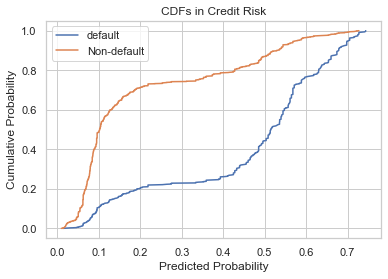

In [60]:
#ploting KS statistics
def plot_cdfs_credit_risk(data, predicted_probability, ground_truth, response_name='default'):
    # Sort the data by predicted probability
    sorted_data = data.sort_values(predicted_probability)

    # Separate the data into default and non-default groups
    default_data = sorted_data[sorted_data[ground_truth] == 1]
    non_default_data = sorted_data[sorted_data[ground_truth] == 0]

    # Calculate the cumulative probabilities
    default_cdf = np.cumsum(default_data[predicted_probability]) / np.sum(default_data[predicted_probability])
    non_default_cdf = np.cumsum(non_default_data[predicted_probability]) / np.sum(non_default_data[predicted_probability])

    # Plot the CDFs
    plt.plot(default_data[predicted_probability], default_cdf, label=response_name)
    plt.plot(non_default_data[predicted_probability], non_default_cdf, label='Non-' + response_name)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Cumulative Probability')
    plt.title('CDFs in Credit Risk')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate the KS statistic
    ks_statistic = np.max(np.abs(default_cdf - non_default_cdf))

    return ks_statistic


ks_statistic = plot_cdfs_credit_risk(data=X_test_reset,predicted_probability='predicted_prob',ground_truth='INTODEFAULT_flag_on12monthsperformancewindow')

In [61]:
#gain Chart

def model_selection_by_gain_chart(model_gains_dict):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(0,100+10,10)), y=list(range(0,100+10,10)),
                    mode='lines+markers',name='Random Model'))
    for model_name,model_gains in model_gains_dict.items():
        model_gains.insert(0,0)
        fig.add_trace(go.Scatter(x=list(range(0,100+10,10)), y=model_gains,
                    mode='lines+markers',name=model_name))
    fig.update_xaxes(
        title_text = "% of Data Set",)

    fig.update_yaxes(title_text = "% of Gain",)
    fig.update_layout(title='Gain Charts',)
    fig.show()
model_selection_by_gain_chart(model_gains_dict={'Credit risk model':logistic_ks_data.Gain.to_list()}) 

In [62]:
# lift chart
def model_selection_by_lift_chart(model_lift_dict):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(10,100+10,10)), y=np.repeat(1,10),
                    mode='lines+markers',name='Random Lift'))
    for model_name,model_lifts in model_lift_dict.items():
        fig.add_trace(go.Scatter(x=list(range(10,100+10,10)), y=model_lifts,
                    mode='lines+markers',name=model_name))
    fig.update_xaxes(
        title_text = "% of Data Set",)

    fig.update_yaxes(title_text = "Lift",)
    fig.update_layout(title='Lift Charts',)
    fig.show()
model_selection_by_lift_chart(model_lift_dict={'Credit Risk Model':logistic_ks_data.Lift.to_list()})

In [63]:
#hosmer lemeshow test
def perform_hosmer_lemeshow_test(y_true, y_pred, num_bins=10):
    df = pd.DataFrame({'ground_truth': y_true, 'predictions': y_pred})
    df['decile'] = pd.qcut(df['predictions'], num_bins, labels=False)
    grouped = df.groupby('decile', as_index=False)
    
    observed_events = grouped['ground_truth'].sum()
    observed_nonevents = grouped['ground_truth'].count() - observed_events
    expected_events = grouped['predictions'].sum()
    expected_nonevents = grouped['predictions'].count() - expected_events
    
    chi_square = (((observed_events - expected_events) ** 2) / expected_events).sum() + \
                 (((observed_nonevents - expected_nonevents) ** 2) / expected_nonevents).sum()
    
    degrees_of_freedom = num_bins - 2
    lm_test = 1 - chi2.cdf(chi_square, degrees_of_freedom)

    return lm_test


lm_test = perform_hosmer_lemeshow_test(y_test,y_prob)

print('lm_test:', lm_test)

lm_test: [1. 1. 1.]


In [64]:
# Binomial normal test
def perform_binomial_normal_test(y_true, y_pred):
    n = len(y_true)
    num_events = sum(y_true)
    p_pred = sum(y_pred) / n
    p_actual = num_events / n
    p_diff = p_pred - p_actual
    std_error = np.sqrt(p_actual * (1 - p_actual) / n)
    z_score = p_diff / std_error
    binomial_test = 2 * (1 - stats.norm.cdf(np.abs(z_score)))
    
    return binomial_test


binomial_test = perform_binomial_normal_test(y_test,y_prob)
print("Binomial test:", binomial_test)

Binomial test: 0.878019484102206


In [70]:
# Assuming alpha = 0.05
alpha = 0.05
binomial_p_value = binom_test(sum(y_test), len(y_test), p=sum(y_prob)/len(y_prob))
if binomial_p_value < alpha:
    print("Binomial test: Model is not well calibrated")
else:
    print("Binomial test: Model is well calibrated")
    
print("Binomial p value:", binomial_p_value)

Binomial test: Model is well calibrated
Binomial p value: 0.8762357855145577


In [71]:
# Perform chi-square test
# Assuming alpha = 0.05
expected_frequency = len(y_test) * sum(y_prob) / len(y_prob)
observed_frequency = sum(y_test)
chi_square_statistic, chi_square_p_value = chisquare([observed_frequency, len(y_test) - observed_frequency], 
                                                     [expected_frequency, len(y_test) - expected_frequency])
if chi_square_p_value < alpha:
    print("Chi-square test: Model is not well calibrated")
else:
    print("Chi-square test: Model is well calibrated")

print("Chi-square p value:", chi_square_p_value)

Chi-square test: Model is well calibrated
Chi-square p value: 0.877772010896661


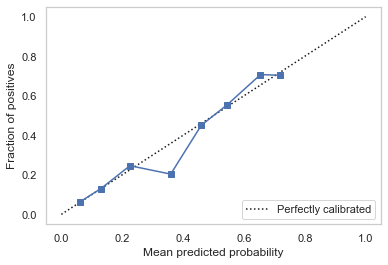

In [72]:
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
disp.plot()
plt.show()

In [73]:
#PSI
def calculate_psi_with_table(expected, observed, bins=5):
    # Bin the data
    breakpoints = np.linspace(np.min(expected), np.max(expected), bins + 1)
    expected_counts, _ = np.histogram(expected, breakpoints)
    observed_counts, _ = np.histogram(observed, breakpoints)
    
    # Calculate proportions
    expected_proportions = expected_counts / len(expected)
    observed_proportions = observed_counts / len(observed)
    
    # Replace 0s to avoid division by zero or log(0)
    expected_proportions_corrected = np.where(expected_proportions == 0, 1e-100, expected_proportions)
    observed_proportions_corrected = np.where(observed_proportions == 0, 1e-100, observed_proportions)
    
    # Calculate PSI for each bin
    psi_values = (observed_proportions_corrected - expected_proportions_corrected) * np.log(observed_proportions_corrected / expected_proportions_corrected)
    
    # Prepare the PSI table
    psi_table = pd.DataFrame({
        'Bin': np.arange(1, bins + 1),
        'Bin Range': [f"{breakpoints[i]} to {breakpoints[i+1]}" for i in range(bins)],
        'Expected Count': expected_counts,
        'Observed Count': observed_counts,
        'Expected Proportion': expected_proportions,
        'Observed Proportion': observed_proportions,
        'PSI': psi_values
    })
    
    # Add a summary row
    total_psi = np.sum(psi_values)
    summary_row = {'Bin': 'Total', 'Bin Range': '', 'Expected Count': np.sum(expected_counts), 'Observed Count': np.sum(observed_counts),
                   'Expected Proportion': 1, 'Observed Proportion': 1, 'PSI': total_psi}
    psi_table = psi_table.append(summary_row, ignore_index=True)
    
    return psi_table, total_psi

# Example usage:
feature_index = 0  # Adjust based on the feature you're interested in
psi_table, total_psi = calculate_psi_with_table(X_train_scaled[:, feature_index], X_test_scaled[:, feature_index])
print(psi_table)

     Bin                                      Bin Range  Expected Count  \
0      1   -0.500877093302758 to -0.0014021205715457619           26200   
1      2  -0.0014021205715457619 to 0.49807285215966646               0   
2      3      0.49807285215966646 to 0.9975478248908787               0   
3      4        0.9975478248908787 to 1.497022797622091               0   
4      5         1.497022797622091 to 1.996497770353303            6573   
5  Total                                                          32773   

   Observed Count  Expected Proportion  Observed Proportion       PSI  
0            6576             0.799439             0.802538  0.000012  
1               0             0.000000             0.000000  0.000000  
2               0             0.000000             0.000000  0.000000  
3               0             0.000000             0.000000  0.000000  
4            1618             0.200561             0.197462  0.000048  
5            8194             1.000000    

In [74]:
print("PSI:", total_psi)

PSI: 6.028268738937536e-05
